In [12]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as sm
import pingouin as pg
import seaborn as sns
import scipy.stats as st
import matplotlib.pyplot as plt
from statsmodels.stats.anova import anova_lm
from statsmodels.stats.outliers_influence import OLSInfluence
from statsmodels.stats.stattools import durbin_watson
from statsmodels.tools.tools import add_constant
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [13]:
data = pd.read_csv('/home/atrides/Desktop/R/statistics_with_Python/07_Regression/Data_Files/ChildAggression.dat', sep='\s+')

In [14]:
data.head()

,Aggression,Television,Computer_Games,Sibling_Aggression,Diet,Parenting_Style
0,0.374160,0.172671,0.141907,-0.328216,-0.110303,-0.279034
1,0.771153,-0.032872,0.709918,0.576837,-0.022990,-1.248167
2,-0.097728,-0.074460,-0.390141,-0.217184,0.280301,-0.328063
3,0.015935,-0.004427,-0.408080,0.046223,-0.263479,-1.005119
4,-0.275385,-0.675239,-0.277778,-0.891045,0.226581,0.489478


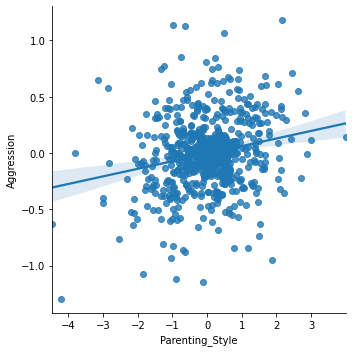

In [15]:
_  = sns.lmplot(x='Parenting_Style', y='Aggression', data=data)

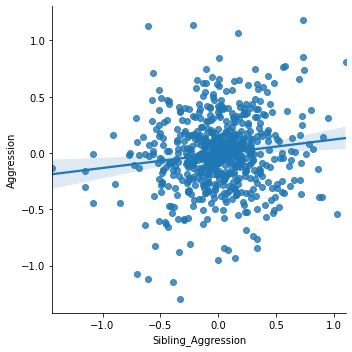

In [16]:
_  = sns.lmplot(x='Sibling_Aggression', y='Aggression', data=data)

In [17]:
m01 = sm.ols('Aggression~Sibling_Aggression+Parenting_Style', data=data).fit()
m01.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Aggression   R-squared:                       0.053
Model:                            OLS   Adj. R-squared:                  0.050
Method:                 Least Squares   F-statistic:                     18.64
Date:                Tue, 15 Sep 2020   Prob (F-statistic):           1.33e-08
Time:                        23:34:40   Log-Likelihood:                -166.19
No. Observations:                 666   AIC:                             338.4
Df Residuals:                     663   BIC:                             351.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             -0.0058      0.012     -0.479      0.632      -0.029       0.018
Sibling_Aggression     0.0934      0.038      2.491      0.013       0.020       0.167
Parenting_Style        0.0620      0.012      5.057      0.000       0.038       0.086
==============================================================================
Omnibus:                       25.520   Durbin-Watson:                   1.890
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               65.000
Skew:                           0.064   Prob(JB):                     7.68e-15
Kurtosis:                       4.525   Cond. No.                         3.12
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [18]:
data.corr()

,Aggression,Television,Computer_Games,Sibling_Aggression,Diet,Parenting_Style
Aggression,1.000000,0.158503,0.186411,0.129335,-0.008582,0.210689
Television,0.158503,1.000000,0.165893,0.227645,0.096094,0.526461
Computer_Games,0.186411,0.165893,1.000000,0.224896,0.242054,0.214527
Sibling_Aggression,0.129335,0.227645,0.224896,1.000000,0.231020,0.173970
Diet,-0.008582,0.096094,0.242054,0.231020,1.000000,0.266427
Parenting_Style,0.210689,0.526461,0.214527,0.173970,0.266427,1.000000


In [19]:
m02 = sm.ols('Aggression~Sibling_Aggression+Parenting_Style+Computer_Games+Diet', data=data).fit()
m02.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Aggression   R-squared:                       0.082
Model:                            OLS   Adj. R-squared:                  0.076
Method:                 Least Squares   F-statistic:                     14.74
Date:                Tue, 15 Sep 2020   Prob (F-statistic):           1.54e-11
Time:                        23:34:44   Log-Likelihood:                -155.96
No. Observations:                 666   AIC:                             321.9
Df Residuals:                     661   BIC:                             344.4
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             -0.0059      0.012     -0.497      0.619      -0.029       0.017
Sibling_Aggression     0.0863      0.038      2.258      0.024       0.011       0.161
Parenting_Style        0.0619      0.013      4.925      0.000       0.037       0.087
Computer_Games         0.1434      0.037      3.891      0.000       0.071       0.216
Diet                  -0.1116      0.038     -2.947      0.003      -0.186      -0.037
==============================================================================
Omnibus:                       25.206   Durbin-Watson:                   1.911
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               64.229
Skew:                           0.051   Prob(JB):                     1.13e-14
Kurtosis:                       4.518   Cond. No.                         3.48
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [20]:
m03 = sm.ols('Aggression~Sibling_Aggression+Parenting_Style+Computer_Games+Diet+Television', data=data).fit()
m03.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Aggression   R-squared:                       0.083
Model:                            OLS   Adj. R-squared:                  0.076
Method:                 Least Squares   F-statistic:                     11.88
Date:                Tue, 15 Sep 2020   Prob (F-statistic):           5.02e-11
Time:                        23:34:45   Log-Likelihood:                -155.71
No. Observations:                 666   AIC:                             323.4
Df Residuals:                     660   BIC:                             350.4
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             -0.0050      0.012     -0.416      0.677      -0.029       0.019
Sibling_Aggression     0.0817      0.039      2.106      0.036       0.006       0.158
Parenting_Style        0.0566      0.015      3.891      0.000       0.028       0.085
Computer_Games         0.1422      0.037      3.851      0.000       0.070       0.215
Diet                  -0.1091      0.038     -2.864      0.004      -0.184      -0.034
Television             0.0329      0.046      0.715      0.475      -0.058       0.123
==============================================================================
Omnibus:                       24.817   Durbin-Watson:                   1.913
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               61.941
Skew:                           0.067   Prob(JB):                     3.55e-14
Kurtosis:                       4.488   Cond. No.                         4.19
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [21]:
anova_res = anova_lm(m01, m02, m03)
anova_res

/home/atrides/.local/lib/python3.8/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/home/atrides/.local/lib/python3.8/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/home/atrides/.local/lib/python3.8/site-packages/scipy/stats/_distn_infrastructure.py:1912: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


,df_resid,ssr,df_diff,ss_diff,F,Pr(>F)
0,663.0,64.229956,0.0,NaN,NaN,NaN
1,661.0,62.288160,2.0,1.941796,10.295511,0.000040
2,660.0,62.239993,1.0,0.048167,0.510769,0.475059


#### model 'm02' seems the right model to study . 

In [22]:
summary_frame = OLSInfluence(m02).summary_frame()
summary_frame.head()

,dfb_Intercept,dfb_Sibling_Aggression,dfb_Parenting_Style,dfb_Computer_Games,dfb_Diet,cooks_d,standard_resid,hat_diag,dffits_internal,student_resid,dffits
0,0.050469,-0.052659,-0.008514,0.034369,-0.010900,0.001269,1.282725,0.003843,0.079669,1.283353,0.079708
1,0.081796,0.145583,-0.160069,0.187100,-0.044260,0.017510,2.299566,0.016287,0.295889,2.307073,0.296855
2,0.004415,-0.002752,-0.001223,-0.005319,0.005472,0.000016,0.112724,0.006201,0.008904,0.112640,0.008897
3,0.014313,0.007969,-0.009797,-0.014142,-0.006406,0.000136,0.356655,0.005332,0.026113,0.356420,0.026096
4,-0.021277,0.058764,-0.015656,0.012308,-0.024166,0.000914,-0.518124,0.016745,-0.067616,-0.517837,-0.067579


In [23]:
summary_frame = summary_frame[['cooks_d','standard_resid', 'student_resid', 'hat_diag' ]]
summary_frame.head()

,cooks_d,standard_resid,student_resid,hat_diag
0,0.001269,1.282725,1.283353,0.003843
1,0.017510,2.299566,2.307073,0.016287
2,0.000016,0.112724,0.112640,0.006201
3,0.000136,0.356655,0.356420,0.005332
4,0.000914,-0.518124,-0.517837,0.016745


In [24]:
resid = pd.DataFrame(data['Aggression'] - m02.fittedvalues)
resid.columns = ['residual']
resid.head()

,residual
0,0.393006
1,0.700136
2,0.034496
3,0.109192
4,-0.157713


In [25]:
dfbeta = pd.DataFrame(pd.DataFrame(OLSInfluence(m02).dfbeta)[0])
dfbeta.columns = ['dfbeta']
dfbeta.head()

,dfbeta
0,0.000601
1,0.000971
2,0.000053
3,0.000171
4,-0.000254


In [26]:
df_ = [data, resid, summary_frame, dfbeta]

In [27]:
from functools import reduce
final_summary = reduce(lambda left,right: pd.merge(left,right, left_index=True, right_index=True), df_)

In [28]:
final_summary.head()

,Aggression,Television,Computer_Games,Sibling_Aggression,Diet,Parenting_Style,residual,cooks_d,standard_resid,student_resid,hat_diag,dfbeta
0,0.374160,0.172671,0.141907,-0.328216,-0.110303,-0.279034,0.393006,0.001269,1.282725,1.283353,0.003843,0.000601
1,0.771153,-0.032872,0.709918,0.576837,-0.022990,-1.248167,0.700136,0.017510,2.299566,2.307073,0.016287,0.000971
2,-0.097728,-0.074460,-0.390141,-0.217184,0.280301,-0.328063,0.034496,0.000016,0.112724,0.112640,0.006201,0.000053
3,0.015935,-0.004427,-0.408080,0.046223,-0.263479,-1.005119,0.109192,0.000136,0.356655,0.356420,0.005332,0.000171
4,-0.275385,-0.675239,-0.277778,-0.891045,0.226581,0.489478,-0.157713,0.000914,-0.518124,-0.517837,0.016745,-0.000254


In [29]:
large_resid  = final_summary[(final_summary['standard_resid']>=2) | (final_summary['standard_resid']<=-2)]
large_resid

,Aggression,Television,Computer_Games,Sibling_Aggression,Diet,Parenting_Style,residual,cooks_d,standard_resid,student_resid,hat_diag,dfbeta
1,0.771153,-0.032872,0.709918,0.576837,-0.022990,-1.248167,0.700136,0.017510,2.299566,2.307073,0.016287,0.000971
44,-0.930984,-0.146957,0.585038,0.143914,0.134157,-1.047096,-0.941623,0.017352,-3.081414,-3.101439,0.009055,-0.001323
46,0.843770,-0.533372,0.626743,0.006194,-0.054253,0.238658,0.738423,0.008421,2.414161,2.423040,0.007173,0.001081
70,-0.860424,-0.327350,-0.102285,0.088454,0.340347,-0.698897,-0.766215,0.005997,-2.501995,-2.512025,0.004767,-0.001114
74,0.737471,0.051045,0.068043,0.742479,0.360753,0.924320,0.652612,0.009421,2.136886,2.142683,0.010211,0.000934
156,1.127466,-0.068346,-0.080328,-0.607668,-0.513091,-0.651064,1.180366,0.027425,3.862791,3.904186,0.009106,0.001918
162,-0.681893,-0.002929,0.424854,0.241092,1.223830,0.299335,-0.639620,0.019994,-2.106958,-2.112470,0.022023,-0.000844
168,0.851637,0.079240,-0.925751,0.737123,0.029569,-0.754699,0.976735,0.056038,3.224402,3.247604,0.026243,0.001527
181,0.806940,0.143652,1.240815,1.103671,0.792906,-0.021341,0.629457,0.032372,2.088228,2.093565,0.035790,0.000779
198,0.581048,-0.736234,-0.510762,-0.194839,-0.754119,-2.845484,0.768967,0.023604,2.528012,2.538400,0.018133,0.001255


In [30]:
cov_ratio = pd.DataFrame(OLSInfluence(m02).cov_ratio)
cov_ratio.columns = ['cov_ratio']
cov_ratio.head()

,cov_ratio
0,0.998959
1,0.983960
2,1.013788
3,1.012026
4,1.022680


In [31]:
k = 4 #number of predictors
n = len(data)#number of objervations

average_leverage = (k+1)/n
average_leverage

0.0075075075075075074

In [32]:
cvr_limit_high = 1+3*average_leverage
cvr_limit_low  = 1-3*average_leverage

(cvr_limit_low, cvr_limit_high)

(0.9774774774774775, 1.0225225225225225)

In [33]:
large_resid = pd.merge(large_resid, cov_ratio, how = 'left', right_index=True, left_index=True)
large_resid

,Aggression,Television,Computer_Games,Sibling_Aggression,Diet,Parenting_Style,residual,cooks_d,standard_resid,student_resid,hat_diag,dfbeta,cov_ratio
1,0.771153,-0.032872,0.709918,0.576837,-0.022990,-1.248167,0.700136,0.017510,2.299566,2.307073,0.016287,0.000971,0.983960
44,-0.930984,-0.146957,0.585038,0.143914,0.134157,-1.047096,-0.941623,0.017352,-3.081414,-3.101439,0.009055,-0.001323,0.945843
46,0.843770,-0.533372,0.626743,0.006194,-0.054253,0.238658,0.738423,0.008421,2.414161,2.423040,0.007173,0.001081,0.970918
70,-0.860424,-0.327350,-0.102285,0.088454,0.340347,-0.698897,-0.766215,0.005997,-2.501995,-2.512025,0.004767,-0.001114,0.965384
74,0.737471,0.051045,0.068043,0.742479,0.360753,0.924320,0.652612,0.009421,2.136886,2.142683,0.010211,0.000934,0.983314
156,1.127466,-0.068346,-0.080328,-0.607668,-0.513091,-0.651064,1.180366,0.027425,3.862791,3.904186,0.009106,0.001918,0.907154
162,-0.681893,-0.002929,0.424854,0.241092,1.223830,0.299335,-0.639620,0.019994,-2.106958,-2.112470,0.022023,-0.000844,0.996153
168,0.851637,0.079240,-0.925751,0.737123,0.029569,-0.754699,0.976735,0.056038,3.224402,3.247604,0.026243,0.001527,0.955896
181,0.806940,0.143652,1.240815,1.103671,0.792906,-0.021341,0.629457,0.032372,2.088228,2.093565,0.035790,0.000779,1.010981
198,0.581048,-0.736234,-0.510762,-0.194839,-0.754119,-2.845484,0.768967,0.023604,2.528012,2.538400,0.018133,0.001255,0.977547


In [34]:
df_new = data.merge(large_resid, how='left', indicator=True)
df_new = df_new[df_new['_merge'] == 'left_only']
df_new.head()

,Aggression,Television,Computer_Games,Sibling_Aggression,Diet,Parenting_Style,residual,cooks_d,standard_resid,student_resid,hat_diag,dfbeta,cov_ratio,_merge
0,0.374160,0.172671,0.141907,-0.328216,-0.110303,-0.279034,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
2,-0.097728,-0.074460,-0.390141,-0.217184,0.280301,-0.328063,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
3,0.015935,-0.004427,-0.408080,0.046223,-0.263479,-1.005119,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
4,-0.275385,-0.675239,-0.277778,-0.891045,0.226581,0.489478,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
5,0.157853,0.202480,0.321508,-0.153713,-0.368638,-1.740982,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only


In [35]:
df_new.reset_index(inplace=True,drop=True)

In [36]:
m02.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Aggression   R-squared:                       0.082
Model:                            OLS   Adj. R-squared:                  0.076
Method:                 Least Squares   F-statistic:                     14.74
Date:                Tue, 15 Sep 2020   Prob (F-statistic):           1.54e-11
Time:                        23:35:03   Log-Likelihood:                -155.96
No. Observations:                 666   AIC:                             321.9
Df Residuals:                     661   BIC:                             344.4
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             -0.0059      0.012     -0.497      0.619      -0.029       0.017
Sibling_Aggression     0.0863      0.038      2.258      0.024       0.011       0.161
Parenting_Style        0.0619      0.013      4.925      0.000       0.037       0.087
Computer_Games         0.1434      0.037      3.891      0.000       0.071       0.216
Diet                  -0.1116      0.038     -2.947      0.003      -0.186      -0.037
==============================================================================
Omnibus:                       25.206   Durbin-Watson:                   1.911
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               64.229
Skew:                           0.051   Prob(JB):                     1.13e-14
Kurtosis:                       4.518   Cond. No.                         3.48
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [37]:
m04 = sm.ols('Aggression~Sibling_Aggression+Parenting_Style+Computer_Games+Diet', data=df_new).fit()
m04.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Aggression   R-squared:                       0.115
Model:                            OLS   Adj. R-squared:                  0.109
Method:                 Least Squares   F-statistic:                     20.24
Date:                Tue, 15 Sep 2020   Prob (F-statistic):           1.08e-15
Time:                        23:35:05   Log-Likelihood:                -2.5151
No. Observations:                 630   AIC:                             15.03
Df Residuals:                     625   BIC:                             37.26
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             -0.0075      0.010     -0.773      0.440      -0.027       0.012
Sibling_Aggression     0.0272      0.032      0.850      0.395      -0.036       0.090
Parenting_Style        0.0698      0.011      6.595      0.000       0.049       0.091
Computer_Games         0.1441      0.031      4.636      0.000       0.083       0.205
Diet                  -0.1131      0.032     -3.529      0.000      -0.176      -0.050
==============================================================================
Omnibus:                        1.012   Durbin-Watson:                   2.008
Prob(Omnibus):                  0.603   Jarque-Bera (JB):                1.105
Skew:                           0.082   Prob(JB):                        0.576
Kurtosis:                       2.876   Cond. No.                         3.54
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

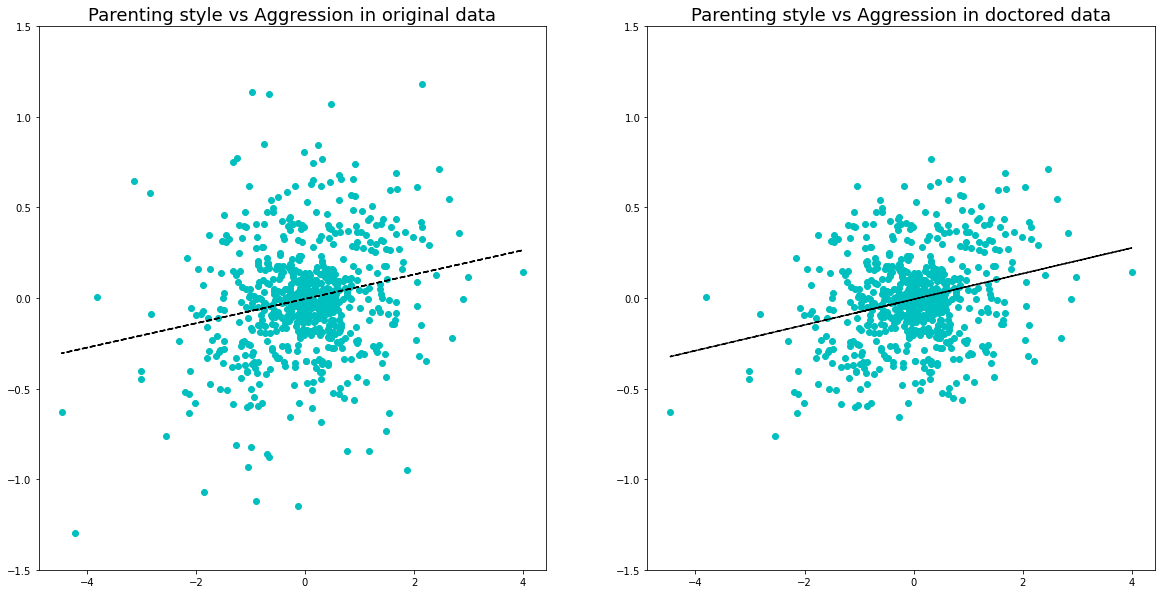

In [38]:
fig = plt.figure(figsize=(20,10))


a1=plt.subplot(122)
coef  =np.polyfit(df_new['Parenting_Style'], df_new['Aggression'],1)
poly1d_fn = np.poly1d(coef) 
_=plt.plot(df_new['Parenting_Style'],df_new['Aggression'],'co' , df_new['Parenting_Style'], poly1d_fn(df_new['Parenting_Style']), '--k')
_=a1.set_ylim([-1.5,1.5])
_=a1.set_title('Parenting style vs Aggression in doctored data', fontdict={'fontsize': 18, 'fontweight': 'medium'})


a2=plt.subplot(121)
coef  =np.polyfit(data['Parenting_Style'], data['Aggression'],1)
poly1d_fn = np.poly1d(coef) 
_=plt.plot(data['Parenting_Style'],data['Aggression'],'co' , data['Parenting_Style'], poly1d_fn(data['Parenting_Style']), '--k')
_=a2.set_ylim([-1.5,1.5])
_=a2.set_title('Parenting style vs Aggression in original data', fontdict={'fontsize': 18, 'fontweight': 'medium'})

In [39]:
from statsmodels.stats.stattools import durbin_watson
durbin_watson(m02.resid)

1.9107416737193195

In [40]:
df_ = add_constant(data)
df_.drop(['Aggression'],axis=1, inplace=True)
df_.head()

,const,Television,Computer_Games,Sibling_Aggression,Diet,Parenting_Style
0,1.0,0.172671,0.141907,-0.328216,-0.110303,-0.279034
1,1.0,-0.032872,0.709918,0.576837,-0.022990,-1.248167
2,1.0,-0.074460,-0.390141,-0.217184,0.280301,-0.328063
3,1.0,-0.004427,-0.408080,0.046223,-0.263479,-1.005119
4,1.0,-0.675239,-0.277778,-0.891045,0.226581,0.489478


In [41]:
vif = pd.Series([variance_inflation_factor(df_.values, i) 
               for i in range(1, df_.shape[1])], 
              index=df_.columns[1:])

vif

Television            1.435525
Computer_Games        1.122719
Sibling_Aggression    1.132618
Diet                  1.160466
Parenting_Style       1.494296
dtype: float64

In [42]:
avg_vif  = np.mean(vif)
avg_vif

1.26912461531214

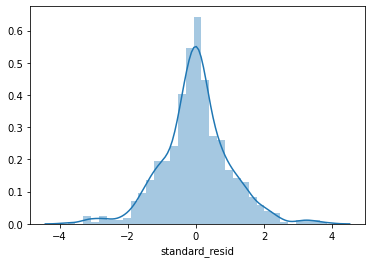

In [43]:
_=sns.distplot(final_summary['standard_resid'])

##### https://stats.stackexchange.com/questions/2492/is-normality-testing-essentially-useless

In [44]:
# performing shapiro-wilk test for checking the normality of errors
st.shapiro(final_summary['standard_resid'])

(0.9783216118812561, 2.28038494753946e-08)

#### It's not an argument. It is a (a bit strongly stated) fact that formal normality tests always reject on the huge sample sizes we work with today. It's even easy to prove that when n gets large, even the smallest deviation from perfect normality will lead to a significant result. And as every dataset has some degree of randomness, no single dataset will be a perfectly normally distributed sample. But in applied statistics the question is not whether the data/residuals ... are perfectly normal, but normal enough for the assumptions to hold.

In [45]:
prediction = pd.DataFrame(m02.fittedvalues)
prediction.columns = ['predicted']
prediction.head()

,predicted
0,-0.018846
1,0.071018
2,-0.132224
3,-0.093256
4,-0.117671


In [46]:
prediction['standarized_prediction']  = (prediction['predicted']-prediction['predicted'].mean())/prediction['predicted'].std()
prediction.head()

,predicted,standarized_prediction
0,-0.018846,-0.151380
1,0.071018,0.831912
2,-0.132224,-1.391963
3,-0.093256,-0.965583
4,-0.117671,-1.232731


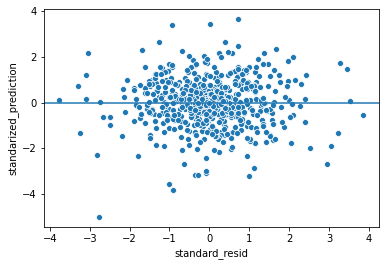

In [47]:
_ = sns.scatterplot(x= final_summary['standard_resid'], y = prediction['standarized_prediction'] )
_ = plt.axhline(y=0)

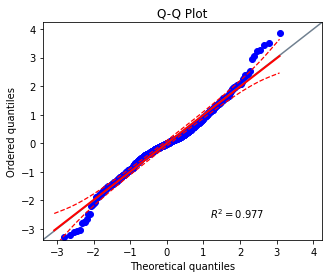

In [48]:
_=pg.qqplot(final_summary['standard_resid'])

# Assumptions Are followed